In [1]:
import os
import matplotlib.pyplot

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds


In [2]:
# !pip install tensorflow_datasets 

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,  # will return tuple (img, label) otherwise dict
    with_info=True,  # able to get info about dataset
)


In [4]:
print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\Smit\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


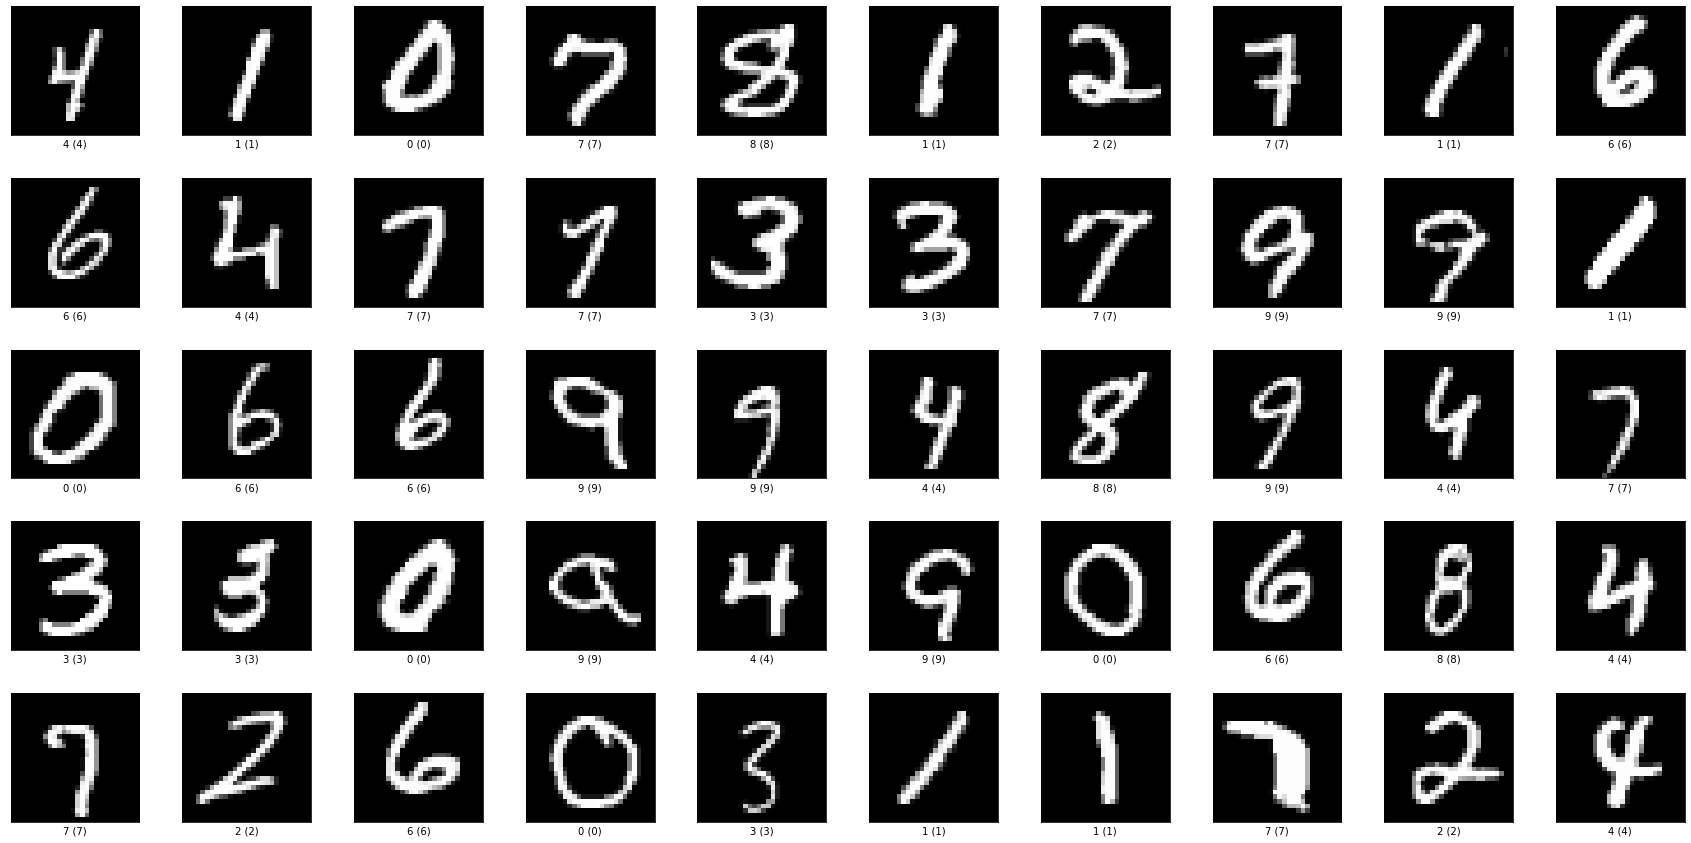

In [5]:
fig = tfds.show_examples(ds_train, ds_info, rows=5, cols=10)
#print(ds_info)


In [6]:
def normalize_img(image, label):
    """Normalizes images"""
    return tf.cast(image, tf.float32) / 255.0, label


AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128


In [7]:
# Setup for train dataset
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache() 
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)


In [8]:
# Setup for test Dataset
ds_test = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_train.batch(128)
ds_test = ds_train.prefetch(AUTOTUNE)


In [9]:
model = keras.Sequential(
    [
        keras.Input((28, 28, 1)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Flatten(),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 10)                216330    
                                                                 
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


In [12]:
model.fit(ds_train, epochs=5, verbose=2)
model.evaluate(ds_test)


Epoch 1/5
469/469 - 6s - loss: 0.2580 - accuracy: 0.9304 - 6s/epoch - 13ms/step
Epoch 2/5
469/469 - 6s - loss: 0.0834 - accuracy: 0.9769 - 6s/epoch - 13ms/step
Epoch 3/5
469/469 - 6s - loss: 0.0585 - accuracy: 0.9829 - 6s/epoch - 12ms/step
Epoch 4/5
469/469 - 6s - loss: 0.0471 - accuracy: 0.9859 - 6s/epoch - 13ms/step
Epoch 5/5
469/469 - 6s - loss: 0.0382 - accuracy: 0.9887 - 6s/epoch - 12ms/step
469/469 [==============================] - 3s 6ms/step - loss: 0.0277 - accuracy: 0.9930


[0.027683673426508904, 0.9929999709129333]

In [13]:
(ds_train, ds_test), ds_info = tfds.load(
    "imdb_reviews",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,  # will return tuple (img, label) otherwise dict
    with_info=True,  # able to get info about dataset
)

tokenizer = tfds.deprecated.text.Tokenizer()


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Smit\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incomplete0HTULR\imdb_reviews-train.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Smit\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incomplete0HTULR\imdb_reviews-test.t…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Smit\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incomplete0HTULR\imdb_reviews-unsupe…

Dataset imdb_reviews downloaded and prepared to C:\Users\Smit\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [14]:
def build_vocabulary():
    vocabulary = set()
    for text, _ in ds_train:
        vocabulary.update(tokenizer.tokenize(text.numpy().lower()))
    return vocabulary


vocabulary = build_vocabulary()


In [15]:
vocabulary

{'suucks',
 'ruehl',
 'alí',
 'modernists',
 'handbags',
 'shimomo',
 'mormons',
 'statesman',
 'contactees',
 'terrorist',
 'stilwell',
 'photojournals',
 'flounced',
 'populations',
 'cling',
 'footnotes',
 'silent',
 'curricular',
 'bulldozers',
 'cpl',
 'rowsdower',
 'aztecs',
 'aced',
 'hugger',
 'anabel',
 'valour',
 'okinawan',
 'pruning',
 'indemnity',
 'rummage',
 'splurges',
 'grandstand',
 'blandness',
 'dusting',
 'ceiling',
 'inexistent',
 'scratchier',
 'na',
 'visuals',
 'jugular',
 'nettie',
 'victimization',
 'mosbey',
 'azariah',
 'miscastings',
 'motorbikes',
 'deneuve',
 'woodward',
 'perfectionism',
 'headphones',
 'honus',
 'kazaam',
 'taps',
 'liquefied',
 'sigrid',
 'edmond',
 'forgetaboutit',
 'oja',
 'rightist',
 'obnoxiousness',
 'innum',
 'handkerchiefs',
 'net',
 'keoma',
 'patni',
 'privateer',
 'outlive',
 'monaco',
 'owned',
 'chomp',
 'reintroducing',
 'scaramouche',
 'hanger',
 'dispatched',
 'steve',
 'charmless',
 'elogious',
 'lecher',
 'processed',

In [16]:
encoder = tfds.deprecated.text.TokenTextEncoder(
    list(vocabulary), oov_token="<UNK>", lowercase=True, tokenizer=tokenizer
)


In [26]:
encoder

<TokenTextEncoder vocab_size=74895>

In [18]:
def my_enc(text_tensor, label):
    encoded_text = encoder.encode(text_tensor.numpy())
    return encoded_text, label


def encode_map_fn(text, label):
    # py_func doesn't set the shape of the returned tensors.
    encoded_text, label = tf.py_function(
        my_enc, inp=[text, label], Tout=(tf.int64, tf.int64)
    )

    # `tf.data.Datasets` work best if all components have a shape set
    #  so set the shapes manually:
    encoded_text.set_shape([None])
    label.set_shape([])

    return encoded_text, label


In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = ds_train.map(encode_map_fn, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.padded_batch(32, padded_shapes=([None], ()))
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(encode_map_fn)
ds_test = ds_test.padded_batch(32, padded_shapes=([None], ()))


In [20]:
model = keras.Sequential(
    [
        layers.Masking(mask_value=0),
        layers.Embedding(input_dim=len(vocabulary) + 2, output_dim=32),
        layers.GlobalAveragePooling1D(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1),
    ]
)  


In [21]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(3e-4, clipnorm=1),
    metrics=["accuracy"],
)


In [22]:
model.fit(ds_train, epochs=15, verbose=1)
model.evaluate(ds_test)


Epoch 1/15
782/782 [==============================] - 30s 36ms/step - loss: 0.6728 - accuracy: 0.5037
Epoch 2/15
782/782 [==============================] - 22s 28ms/step - loss: 0.4928 - accuracy: 0.7205
Epoch 3/15
782/782 [==============================] - 22s 28ms/step - loss: 0.3400 - accuracy: 0.8566
Epoch 4/15
782/782 [==============================] - 21s 27ms/step - loss: 0.2706 - accuracy: 0.8919
Epoch 5/15
782/782 [==============================] - 21s 26ms/step - loss: 0.2308 - accuracy: 0.9115
Epoch 6/15
782/782 [==============================] - 22s 28ms/step - loss: 0.2010 - accuracy: 0.9243
Epoch 7/15
782/782 [==============================] - 23s 29ms/step - loss: 0.1785 - accuracy: 0.9344
Epoch 8/15
782/782 [==============================] - 23s 30ms/step - loss: 0.1578 - accuracy: 0.9442
Epoch 9/15
782/782 [==============================] - 23s 29ms/step - loss: 0.1397 - accuracy: 0.9523
Epoch 10/15
782/782 [==============================] - 22s 28ms/step - loss: 0.122

[0.34660643339157104, 0.8845999836921692]